# Bilby 4 param BBH tutorial

Tutorial to demonstrate running parameter estimation on a reduced parameter
space for an injected binary black hole signal.





## Fixed parameters

1. Extrinsic
    1. Polarization angle `psi`, 
    1. Sky location `ra`, `dec`,
    1. Signal's arrival time at geocenter `geocent_time`,
    1. Orbital / coalescence `phase`,
1. Intrinsic
    1. Spin components `a_1`, `a_2`, `tilt_1`, `tilt_2`, `phi_12`, `phi_jl`

##  To sample over
1. Intrinsic:
    1. Component masses `m_1`, `m_2` in terms of `mass_ratio`, `chirp_mass`
    
    \begin{equation}
     q = \dfrac{m_1}{m_2} \qquad,\,\, \mathcal{M} = \dfrac{(m_1 * m_2)^{3/5}}{(m_1 + m_2)^{1/5}}
    \end{equation}

1. Extrinsic:
    1. Luminosity distance `luminosity_distance`
    1. Inclination angle `theta_jn`


## Priors
1. Uniform in (component masses)
1. Uniform in comoving volume prior on luminosity distance (100Mpc, 5Gpc)
1. 


## Available samplers

https://bilby-dev.github.io/bilby/samplers.html

In [1]:
import bilby

# Set the duration and sampling frequency of the data segment that we're
# going to inject the signal into
duration = 4.0
sampling_frequency = 2048.0
minimum_frequency = 20

# Specify the output directory and the name of the simulation.
outdir = "bbh_outdir"
label = "4p_tutorial"

/home/vaishakprasad/soft/anaconda/envs/igwn-py310/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Injection parameters

In [ ]:

bilby.core.utils.setup_logger(outdir=outdir, 
                              label=label, 
                              log_level="DEBUG")

# Set up a random seed for result reproducibility.  This is optional!
bilby.core.utils.random.seed(88170235)

# We are going to inject a binary black hole waveform.  We first establish a
# dictionary of parameters that includes all of the different waveform
# parameters, including masses of the two black holes (mass_1, mass_2),
# spins of both black holes (a, tilt, phi), etc.
injection_parameters = dict(
    mass_1=36.0,
    mass_2=29.0,
    a_1=0.4,
    a_2=0.3,
    tilt_1=0.5,
    tilt_2=1.0,
    phi_12=1.7,
    phi_jl=0.3,
    luminosity_distance=2000.0,
    theta_jn=0.4,
    psi=2.659,
    phase=1.3,
    geocent_time=1126259642.413,
    ra=1.375,
    dec=-1.2108,
)

m1 = injection_parameters["mass_1"]
m2 = injection_parameters["mass_2"]
inj_mass_ratio = injection_parameters["mass_2"]/injection_parameters["mass_1"]

inj_chirp_mass = ((m1*m2)**(3/5)) /(m1+m2)**(1/5)

In [ ]:
truths = {"mass_ratio" : inj_mass_ratio,
          "chirp_mass" : inj_chirp_mass,
          "luminosity_distance": injection_parameters["luminosity_distance"],
          "theta_jn" : injection_parameters["theta_jn"]}

# Waveform generator

In [3]:

# Fixed arguments passed into the source model
waveform_arguments = dict(
    waveform_approximant="IMRPhenomXPHM",
    reference_frequency=50.0,
    minimum_frequency=minimum_frequency,
)

# Create the waveform_generator using a LAL BinaryBlackHole source function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)

11:11 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


## Inject the signal into the detector

In [4]:
# Set up interferometers.  In this case we'll use two interferometers
# (LIGO-Hanford (H1), LIGO-Livingston (L1). These default to their design
# sensitivity
ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency,
    duration=duration,
    start_time=injection_parameters["geocent_time"] - 2,
)



ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)

# Set up a PriorDict, which inherits from dict.
# By default we will sample all terms in the signal models.  However, this will
# take a long time for the calculation, so for this example we will set almost
# all of the priors to be equall to their injected values.  This implies the
# prior is a delta function at the true, injected value.  In reality, the
# sampler implementation is smart enough to not sample any parameter that has
# a delta-function prior.
# The above list does *not* include mass_1, mass_2, theta_jn and luminosity
# distance, which means those are the parameters that will be included in the
# sampler.  If we do nothing, then the default priors get used.


11:11 bilby DEBUG   : PSD file set to None
11:11 bilby DEBUG   : PSD file aLIGO_O4_high_asd.txt exists in default dir.
11:11 bilby DEBUG   : Assuming L shape for name
11:11 bilby DEBUG   : PSD file set to None
11:11 bilby DEBUG   : PSD file aLIGO_O4_high_asd.txt exists in default dir.
11:11 bilby DEBUG   : Assuming L shape for name
11:11 bilby DEBUG   : Setting data using noise realization from providedpower_spectal_density
11:11 bilby DEBUG   : Setting data using noise realization from providedpower_spectal_density
/home/vaishakprasad/soft/anaconda/envs/igwn-py310/lib/python3.10/site-packages/bilby/gw/source.py:528: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functi

[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

## Define the priors

In [5]:
priors = bilby.gw.prior.BBHPriorDict()
for key in [
    "a_1",
    "a_2",
    "tilt_1",
    "tilt_2",
    "phi_12",
    "phi_jl",
    "psi",
    "ra",
    "dec",
    "geocent_time",
    "phase",
#    "theta_jn"
]:
    priors[key] = injection_parameters[key]

# Perform a check that the prior does not extend to a parameter space longer than the data
priors.validate_prior(duration, minimum_frequency)

11:11 bilby INFO    : No prior given, using default BBH priors in /home/vaishakprasad/soft/anaconda/envs/igwn-py310/lib/python3.10/site-packages/bilby/gw/prior_files/precessing_spins_bbh.prior.
11:11 bilby DEBUG   : Supplied PDF for luminosity_distance is not normalised, normalising.
11:11 bilby DEBUG   : Supplied PDF for luminosity_distance is not normalised, normalising.
11:11 bilby DEBUG   : Supplied PDF for luminosity_distance is not normalised, normalising.
11:11 bilby DEBUG   : dec converted to delta function prior.
11:11 bilby DEBUG   : ra converted to delta function prior.
11:11 bilby DEBUG   : psi converted to delta function prior.
11:11 bilby DEBUG   : phase converted to delta function prior.
11:11 bilby DEBUG   : a_1 converted to delta function prior.
11:11 bilby DEBUG   : a_2 converted to delta function prior.
11:11 bilby DEBUG   : tilt_1 converted to delta function prior.
11:11 bilby DEBUG   : tilt_2 converted to delta function prior.
11:11 bilby DEBUG   : phi_12 converted

True

## Initialize the likelihood

In [ ]:
# Initialise the likelihood by passing in the interferometer data (ifos) and
# the waveform generator
likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator
)

11:11 bilby DEBUG   : The waveform_generator start_time is not equal to that of the provided interferometers. Overwriting the waveform_generator.
11:11 bilby DEBUG   : Time jittering requested with non-time-marginalised likelihood, ignoring.


## Run the sampler

In [7]:

# Run sampler.  In this case we're going to use the `dynesty` sampler
result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler="dynesty",
    npoints=100,
    injection_parameters=injection_parameters,
    outdir=outdir,
    label=label,
    result_class=bilby.gw.result.CBCResult,
)

11:11 bilby INFO    : Running for label '4p_tutorial', output will be saved to 'bbh_outdir'
11:11 bilby DEBUG   : mass_1 already in prior
11:11 bilby DEBUG   : mass_2 already in prior
11:11 bilby DEBUG   : mass_ratio already in prior
11:11 bilby DEBUG   : chirp_mass already in prior
11:11 bilby DEBUG   : luminosity_distance already in prior
11:11 bilby DEBUG   : dec already in prior
11:11 bilby DEBUG   : ra already in prior
11:11 bilby DEBUG   : theta_jn already in prior
11:11 bilby DEBUG   : psi already in prior
11:11 bilby DEBUG   : phase already in prior
11:11 bilby DEBUG   : a_1 already in prior
11:11 bilby DEBUG   : a_2 already in prior
11:11 bilby DEBUG   : tilt_1 already in prior
11:11 bilby DEBUG   : tilt_2 already in prior
11:11 bilby DEBUG   : phi_12 already in prior
11:11 bilby DEBUG   : phi_jl already in prior
11:11 bilby DEBUG   : geocent_time already in prior
11:11 bilby INFO    : Using lal version 7.6.1
11:11 bilby INFO    : Using lal git version Branch: None;Tag: lal-v7

1it [00:00, ?it/s]

11:11 bilby DEBUG   : Running sampler with checkpointing
11:11 bilby DEBUG   : it: 393, accept: 51, reject: 0, fail: 342, act: 29.00, nact: 13.55 
11:11 bilby DEBUG   : it: 921, accept: 126, reject: 0, fail: 795, act: 47.46, nact: 19.40 
11:11 bilby DEBUG   : it: 1647, accept: 232, reject: 0, fail: 1415, act: 50.57, nact: 32.57 
11:11 bilby DEBUG   : it: 2087, accept: 299, reject: 0, fail: 1788, act: 58.33, nact: 35.78 
11:11 bilby DEBUG   : it: 2501, accept: 376, reject: 0, fail: 2125, act: 66.07, nact: 37.85 
11:11 bilby DEBUG   : it: 2902, accept: 431, reject: 0, fail: 2471, act: 60.91, nact: 47.64 
11:11 bilby DEBUG   : it: 2973, accept: 445, reject: 0, fail: 2528, act: 60.60, nact: 49.06 
11:11 bilby DEBUG   : it: 3002, accept: 453, reject: 0, fail: 2549, act: 60.35, nact: 49.74 
11:11 bilby DEBUG   : act: 60.08, max failures: 48, thin: 122, iteration: 3018, n_found: 24
11:11 bilby DEBUG   : Finished building cache with length 24 after 3018 iterations with 1035 likelihood calls an

## Plot the results

11:17 bilby DEBUG   : Using BILBY_STYLE=default
11:17 bilby DEBUG   : Saving corner plot to /home/vaishakprasad/Projects/n3pm/bbh_outdir/4p_tutorial_corner.png


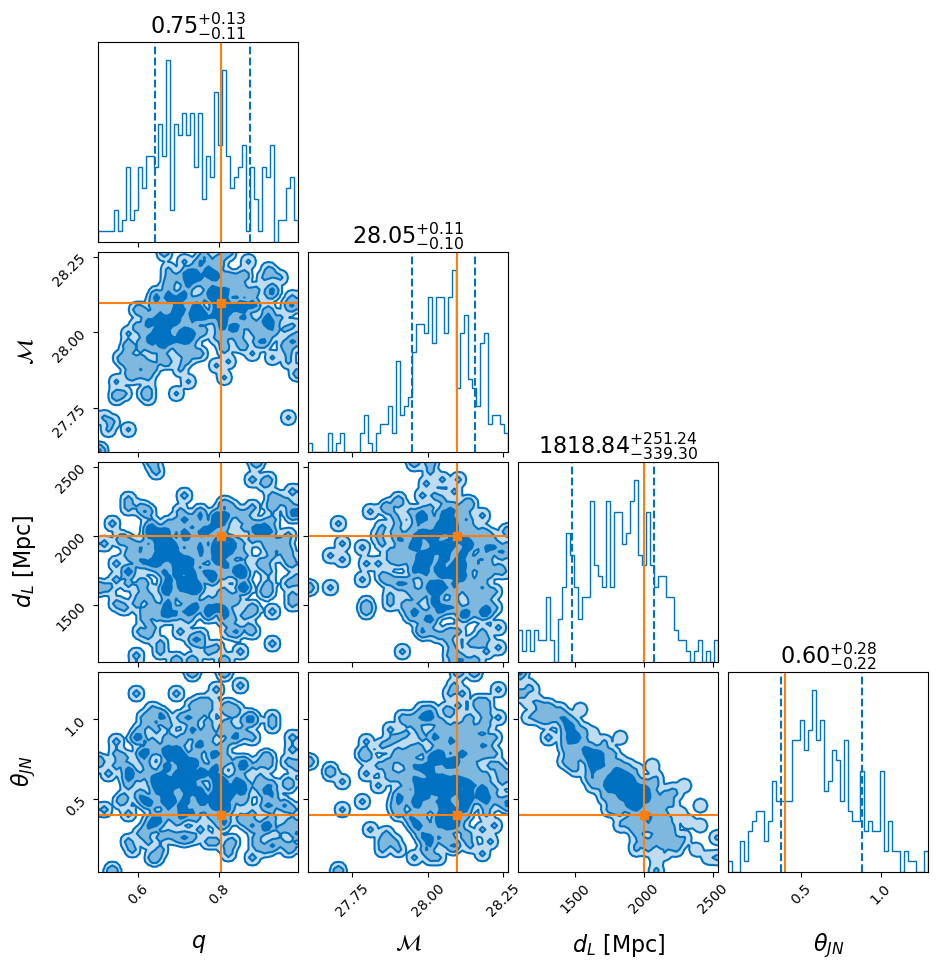

In [ ]:
# Make a corner plot.
result.plot_corner(truths=truths)